# Shelby Richards

July 2, 2022

CS379 Machine Learning

Professor Debora Elam

This project will begin by importing the Titanic data set. It will then clean the data up, removing any null values and any unneeded columns. The project will then proceed by implemeting two types of learning, supervised and unsupervised, to determine who might survive. Finally, the supervised and unsupervised learning algorithms will be evaluated.

In [1]:
#Import libraries
import pandas as pd #create and manipulate dataframes
import numpy as np #Compute complex algebraic formulae
import matplotlib.pyplot as plt #used to graphically represent data
import seaborn as sns #used to graphically represent data

#Import the CSV file with the data and print the first 10 lines to show it was done successfully
titanic = pd.read_csv(r"C:\Users\ss402\OneDrive\Desktop\CS379T-Week-1-IP.csv", index_col=0) #Set index column to 0
titanic.head(10) #Show first 10 rows to verify everything looks ok

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
pclass,,,,,,,,,,,,,
1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


In [2]:
#Show data type for each column
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 1310 entries, 1.0 to nan
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   survived   1309 non-null   float64
 1   name       1309 non-null   object 
 2   sex        1309 non-null   object 
 3   age        1046 non-null   float64
 4   sibsp      1309 non-null   float64
 5   parch      1309 non-null   float64
 6   ticket     1309 non-null   object 
 7   fare       1308 non-null   float64
 8   cabin      295 non-null    object 
 9   embarked   1307 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
dtypes: float64(6), object(7)
memory usage: 143.3+ KB


In [3]:
#Summarize the data
titanic.describe()


,survived,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
#Show null values for each column
titanic.isnull().sum()

survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [5]:
#Drop any unneeded values (such as cabin, body, and home.dest)

titanic = titanic.drop(['cabin', 'body', 'home.dest', 'boat'], axis=1)
#Verify that values are dropped:
titanic.head()

,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
pclass,,,,,,,,,
1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [6]:
#Replace any null values with 0 for float types:

titanic['age'] = titanic['age'].fillna(0)
titanic['fare'] = titanic ['fare'].fillna(0)
titanic['survived'] = titanic ['survived'].fillna(0)
titanic['sibsp'] = titanic ['sibsp'].fillna(0)
titanic['parch'] = titanic ['parch'].fillna(0)


#Replace any null values for object types:
titanic['embarked'].fillna('S', inplace = True)
titanic['sex'].fillna('female', inplace=True) #Changed value to female because sex is only male or female


#Verify that all values listed above are now at 0
titanic.isnull().sum()

survived    0
name        1
sex         0
age         0
sibsp       0
parch       0
ticket      1
fare        0
embarked    0
dtype: int64

While name and ticket still have a null value, they're getting removed anyway.

Now that all the null values are filled, we need to replace male and female with numbers, as well as the embarked values.

In [7]:
#Convert sex from names (Male/Female) to (0/1)
titanic['sex'] = titanic['sex'].replace(['female'], 0)
titanic['sex'] = titanic['sex'].replace(['male'], 1)

#Replace embarked values with int values
titanic['embarked'] = titanic['embarked'].replace(['S'], 0)
titanic['embarked'] = titanic['embarked'].replace(['C'], 1)
titanic['embarked'] = titanic['embarked'].replace(['Q'], 2)

titanic.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 1310 entries, 1.0 to nan
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1310 non-null   float64
 1   name      1309 non-null   object 
 2   sex       1310 non-null   int64  
 3   age       1310 non-null   float64
 4   sibsp     1310 non-null   float64
 5   parch     1310 non-null   float64
 6   ticket    1309 non-null   object 
 7   fare      1310 non-null   float64
 8   embarked  1310 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 102.3+ KB


Now that all the data is prepared, we can proceed with the learning algorithms.


## Supervised Learning: Decision Tree

In [8]:
#import
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Creating x and y
X = titanic.drop(['survived', 'name', 'ticket', 'embarked'], axis=1).values 
Y = titanic['survived'].values 

print(X.shape)

(1310, 5)


In [9]:
#Split data into 80% training and 20% testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [10]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
def models(X_train,Y_train):  
#Using Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)
  print('Decision Tree Classifier Training Accuracy:', (tree.score(X_train, Y_train))*100)
  return tree

In [12]:
#Get and train all of the models
model = models(X_train,Y_train)

Decision Tree Classifier Training Accuracy: 97.04198473282443


## Unsupervised Learning: K-Means Clustering

In [13]:
#import

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Ceate x, drop all values not float or Int (basically, drop all the Objects)
X_unsupervised = titanic.drop(['name', 'ticket', 'survived'], axis=1).values


#Set y to 'survived'
y = titanic['survived'].values

#Building model using two clusters, one for survival and one for not
kmeans = KMeans(n_clusters=2) 

#Scale X to fit the data

scaler = MinMaxScaler()
X_unsupervised=scaler.fit_transform(X_unsupervised) 


kmeans.fit(X_unsupervised)

KMeans(n_clusters=2)

In [14]:
eval = 0 

#Evaluate to see percentage
for i in range(len(X_unsupervised)):
    predict = np.array(X_unsupervised[i].astype(float))
    predict = predict.reshape(-1, len(predict))
    prediction = kmeans.predict(predict)
    if prediction[0] == y[i]:
        eval +=1
        
print(eval/len(X_unsupervised)*100)

77.93893129770993


# Evaluation:

This project was fascinating to me. Even though I had taken another class before (Big Data Analytics), that class mainly was evaluating excel files. This project gave me a crash course in Python learning algorithms, and while intimidating at first, I believe that I have a much stronger understanding than before I started this project. The links provided by the instructor gave some insight into how each learning algorithm worked. Still, I ran into trouble when I tried to implement them using the data provided in the individual project. 
After trying to make the data work with the given code for a while, I took a step back and cleaned up the data first. From there, I worked on implementing first the supervised learning algorithm (decision tree) and then the unsupervised learning algorithm (k-means). Unfortunately, though I tinkered with the code for a while, I could never implement the data evaluations into the submitted code without causing significant issues with the rest of it. However, I am including a screenshot of another version of this code I was working on:
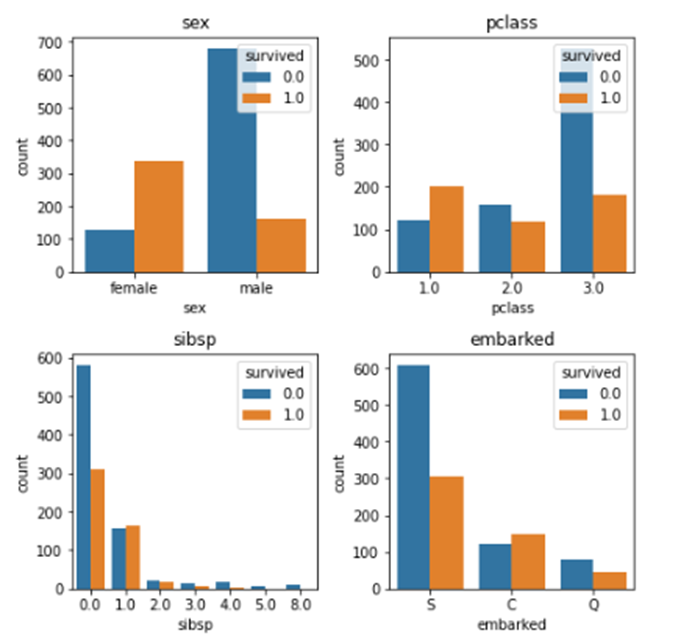 
A few things that I noticed about the data is that more females survived the titanic crash than males, which I expected from my limited knowledge of the titanic. It is also interesting to note that more people survived from 1st and 2nd class, while the 3rd class had astronomical casualties. Additionally, while more people did not survive than those who embarked on “S,” they also had the most significant number of survivors.



While implementing the supervised learning algorithm, I noticed that it was much faster to calculate than its unsupervised counterpart. While the supervised algorithm calculated its result just about as soon as I pressed ‘Run,’ the unsupervised algorithm would still be calculating 30 seconds later. Additionally, the supervised algorithm (decision tree) is much more accurate than the unsupervised (k-means) one.


## References:

Jupyter/ipython Notebook quick start guide. Jupyter/IPython Notebook Quick Start Guide - Jupyter/IPython Notebook Quick Start Guide 0.1 documentation. (n.d.). Retrieved July 2, 2022, from https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ 

Python: Decision tree implementation. GeeksforGeeks. (2022, April 26). Retrieved July 2, 2022, from https://www.geeksforgeeks.org/decision-tree-implementation-python/ 

randerson112358. (2022, April 9). Titanic survival prediction using machine learning. Medium. Retrieved July 2, 2022, from https://betterprogramming.pub/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16 

Real Python. (2021, January 8). K-means clustering in Python: A practical guide. Real Python. Retrieved July 2, 2022, from https://realpython.com/k-means-clustering-python/ 

Tracyrenee. (2021, July 22). Using KMEANS clustering to predict survivors of the Titanic. Medium. Retrieved July 2, 2022, from https://medium.com/mlearning-ai/using-kmeans-clustering-to-predict-survivors-of-the-titanic-ae3d3e959eb8 

TracyRenee61. (2021, July 21). Titanic-datasets/total_titanic_data_analysis_clustering.ipynb at master · tracyrenee61/titanic-datasets. GitHub. Retrieved July 2, 2022, from https://github.com/TracyRenee61/Titanic-Datasets/blob/master/Total_Titanic_Data_Analysis_Clustering.ipynb 